In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3>Read Data</h3>

This section reads data from the provided .csv file which has the ratings provided by different users for differnt products. This file was provided in the problem

Apart from this file, the site mentioned about metadata, but seems like metadata information is not available in the website, but we have to email to get the informatio about the same. It would have been useful to have this info so that we can take a look at the product title and derive some information. 

On the other hand, review information along with ASIN is made available in the website. But the basic assumption here is to assume to have only the user, product and ratings

In [2]:
re_df = pd.read_csv('ratings_Electronics.csv',names=['user_id','product_id','rating','timestamp'])
re_df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
user_id       object
product_id    object
rating        float64
timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


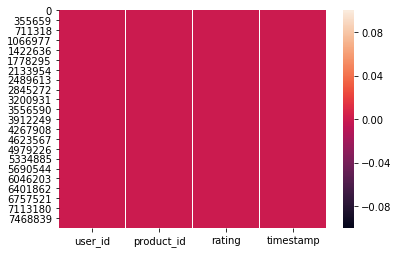

In [4]:
sns.heatmap(re_df.isnull())

In [5]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('meta_Electronics.json.gz')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498196 entries, 0 to 498195
Data columns (total 9 columns):
asin           498196 non-null object
imUrl          498021 non-null object
description    459470 non-null object
categories     498196 non-null object
title          491194 non-null object
price          389693 non-null float64
salesRank      128706 non-null object
related        366959 non-null object
brand          142532 non-null object
dtypes: float64(1), object(8)
memory usage: 38.0+ MB


In [7]:
df.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [8]:
##df.to_csv('reviews.csv')

In [9]:
re_df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [10]:
df.isnull().any()

asin           False
imUrl           True
description     True
categories     False
title           True
price           True
salesRank       True
related         True
brand           True
dtype: bool

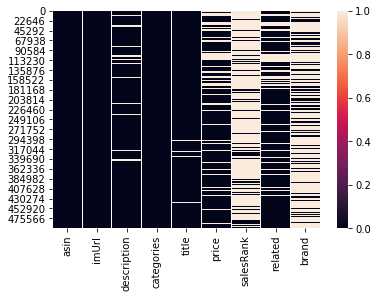

In [11]:
sns.heatmap(df.isnull())

<h3>Dataset exploration and characteristics</h3>

Dataset has the ratings given by different users for different products. In general, this dataset consists of more representation from customers who have given high ratings. Customers who have given low ratings have very low representation

Also, when the products are grouped and their mean rating is obtained. It is found that the mean ratings are high for products which have been rated just once. This cannot be right as just one rating is not suffice to reflect the rating of the product

Also, from the joint plot, it is evident that high average mean rated products have more number of reviews as well


<h4>Unique users and products</h4>

In [12]:
print('unique users in the dataset is ', np.count_nonzero(re_df['user_id'].unique()))
print('unique products in the dataset is ', np.count_nonzero(re_df['product_id'].unique()))

unique users in the dataset is  4201696
unique products in the dataset is  476002


<h4>Ratings Countplot</h4>

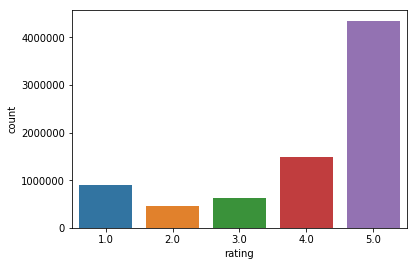

In [13]:
sns.countplot(re_df['rating'])

<h4>Reasoning of meanRating with count of reviews for products</h4>

As we can see here, product_id = '0132793040' has a mean rating of 5.0, but it is just reviewed by one user in the dataset
product_id = 'B0074BW614' has max number of reviews (18244), but its mean rating is 4.49

This doesn't mean that product_id = '0132793040' is better than 'B0074BW614' as B0074BW614 is reviewed by lot many users than 0132793040

In [14]:
re_df.groupby(by='product_id').mean().sort_values(by='rating',ascending=False).head()

,rating,timestamp
product_id,,
0132793040,5.0,1.365811e+09
B004SGH244,5.0,1.372637e+09
B004SQBRRM,5.0,1.312675e+09
B004SQC6O0,5.0,1.374624e+09
B004SQE6YI,5.0,1.309392e+09


In [15]:
re_df[re_df['product_id']=='0132793040']

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200


In [16]:
re_df.groupby('product_id').count().sort_values(by='user_id',ascending=False).head()

,user_id,rating,timestamp
product_id,,,
B0074BW614,18244,18244,18244
B00DR0PDNE,16454,16454,16454
B007WTAJTO,14172,14172,14172
B0019EHU8G,12285,12285,12285
B006GWO5WK,12226,12226,12226


<h4>Analysis of meanRating and count of reviews for product </h4>

Form a dataframe with meanRating and count of reviews for each product and analyse the same

In [17]:
meanRating = re_df.groupby('product_id').mean()['rating']
meanRating.head()

product_id
0132793040    5.000000
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
Name: rating, dtype: float64

In [18]:
ratingCount = re_df.groupby('product_id').count()['rating']
ratingCount.head()

product_id
0132793040     1
0321732944     1
0439886341     3
0511189877     6
0528881469    27
Name: rating, dtype: int64

In [19]:
product_rating = pd.DataFrame(data={'meanRating':meanRating,'count':ratingCount})
product_rating.sort_values(by='count',ascending=False).head()

,meanRating,count
product_id,,
B0074BW614,4.491504,18244
B00DR0PDNE,3.931020,16454
B007WTAJTO,4.424005,14172
B0019EHU8G,4.754497,12285
B006GWO5WK,4.314657,12226


C:\Users\senth\AIML\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


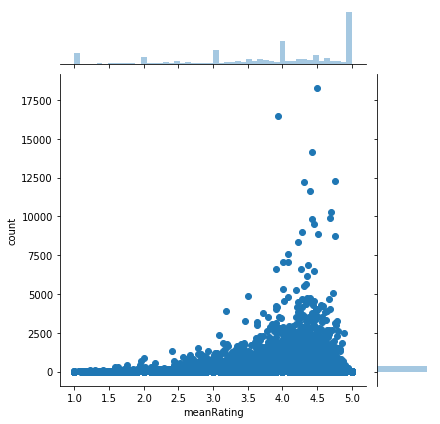

In [20]:
sns.jointplot(product_rating['meanRating'],product_rating['count'])

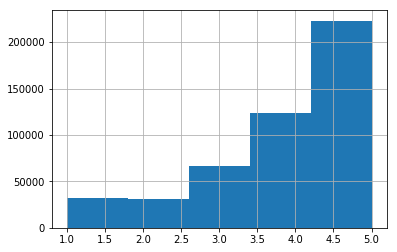

In [21]:
product_rating['meanRating'].hist(bins=5)

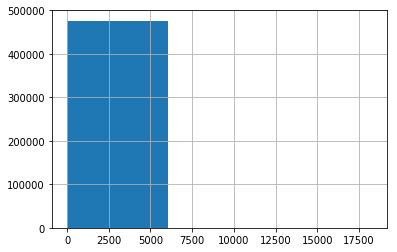

In [22]:
product_rating['count'].hist(bins=3)

<h3>Filter users who have given 50+ ratings</h3>

Unique users in the dataset who has given ratings is around 42 lakhs. Filtering users who have given 50+ reviews for amazon products. After filtering, the number of users who have given 50+ ratings is 1540. Extract only the product reviews given by these 1540 users into a new dataframe

So, after filtering

Number of total reviews in the the dataset has been reduced from 7824K reviews to 125K reviews

Number of unique users in the dataset has been reduced from 4201K to 1.5K 

Number of unique products in the dataset has been reduced from 476K to 48K

In [23]:
re_df_userId = re_df.groupby(by='user_id').count()
re_df_userId.head()

,product_id,rating,timestamp
user_id,,,
A00000262KYZUE4J55XGL,1,1,1
A000063614T1OE0BUSKUT,2,2,2
A00009182QVLSWIGHLS1B,1,1,1
A00009661LC9LQPGKJ24G,1,1,1
A00010809P09NUU6ZP6H,1,1,1


In [24]:
re_df_userId50 = re_df_userId[re_df_userId['rating'] >= 50]
re_df_userId50.head()

,product_id,rating,timestamp
user_id,,,
A100UD67AHFODS,116,116,116
A100WO06OQR8BQ,132,132,132
A105S56ODHGJEK,68,68,68
A105TOJ6LTVMBG,71,71,71
A10AFVU66A79Y1,65,65,65


In [25]:
re_df_userId50.sort_values(by='rating',ascending=False).head()

,product_id,rating,timestamp
user_id,,,
A5JLAU2ARJ0BO,520,520,520
ADLVFFE4VBT8,501,501,501
A3OXHLG6DIBRW8,498,498,498
A6FIAB28IS79,431,431,431
A680RUE1FDO8B,406,406,406


In [26]:
re_df_userId50.sort_values(by='rating',ascending=False).describe()

,product_id,rating,timestamp
count,1540.000000,1540.000000,1540.000000
mean,81.734416,81.734416,81.734416
std,46.340509,46.340509,46.340509
min,50.000000,50.000000,50.000000
25%,56.000000,56.000000,56.000000
50%,66.000000,66.000000,66.000000
75%,89.000000,89.000000,89.000000
max,520.000000,520.000000,520.000000


In [27]:
re_df_users50 = pd.DataFrame(re_df_userId50.index)
re_df_users50.head()

,user_id
0,A100UD67AHFODS
1,A100WO06OQR8BQ
2,A105S56ODHGJEK
3,A105TOJ6LTVMBG
4,A10AFVU66A79Y1


In [28]:
reviews_df = re_df[re_df['user_id'].isin(re_df_users50['user_id'])]
reviews_df.head()

,user_id,product_id,rating,timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200


In [29]:
reviews_df.groupby(by='user_id').count().sort_values(by='rating',ascending=False).head()

,product_id,rating,timestamp
user_id,,,
A5JLAU2ARJ0BO,520,520,520
ADLVFFE4VBT8,501,501,501
A3OXHLG6DIBRW8,498,498,498
A6FIAB28IS79,431,431,431
A680RUE1FDO8B,406,406,406


In [30]:
reviews_df.describe()

,rating,timestamp
count,125871.000000,1.258710e+05
mean,4.261339,1.321979e+09
std,1.062144,7.583599e+07
min,1.000000,9.396000e+08
25%,4.000000,1.286928e+09
50%,5.000000,1.346717e+09
75%,5.000000,1.377130e+09
max,5.000000,1.406074e+09


In [31]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 4 columns):
user_id       125871 non-null object
product_id    125871 non-null object
rating        125871 non-null float64
timestamp     125871 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


In [32]:
print('number of unique users in the filtered dataset is ', np.count_nonzero(reviews_df['user_id'].unique()))
print('number of unique products in the filtered dataset is ', np.count_nonzero(reviews_df['product_id'].unique()))

number of unique users in the filtered dataset is  1540
number of unique products in the filtered dataset is  48190


<h3>Split data into training and test</h3>

Train-Test split is done to evaluate the recommender system. Train-Test split can be done in one of the following modes

    1) Random test-train split of the dataset

    2) Chronological ordering by timestamp and consider first 70% as train and rest 30% as test. This evaluates whether the system is able to recommend future

    3) Have equal number of users in train and test set

Here below, we have gone with approach#2. If time permits, we can try with approach #1 and approach #3 as well

The final check ensures that test set does not have any data that is greater than max timestamp in the train set

In [33]:
from sklearn.model_selection import train_test_split
reviews_df.sort_values(by='timestamp',ascending=True,inplace=True)
train_index = int(reviews_df.shape[0]*0.7)
train_index

C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


88109

In [34]:
X_train = reviews_df[0:train_index]
X_test = reviews_df[train_index:]

In [35]:
print(X_train.shape)
print(X_test.shape)

(88109, 4)
(37762, 4)


In [36]:
X_train['timestamp'].max()

1370908800

In [37]:
X_test[X_test['timestamp'] < X_train['timestamp'].max()]

,user_id,product_id,rating,timestamp


<h3>Popularity Recommender model</h3>

In [38]:
## Return products by descending order of rating

def popularModel():
    return re_df.sort_values(by='rating', ascending=False).head(10)

In [39]:
## Return products by descending order of rating

def trainPopularRecommendModel(train_data):
    return train_data.sort_values(by='rating', ascending=False)

In [40]:
## Return products not bought by used in the Training data

def returnProductsNotBoughtByUserInTraining(trainedData, userId, k):
    boughtProducts = trainedData[trainedData['user_id']==userId]['product_id']
    ##print(boughtProducts)
    productsNotRatedByUser = ~trainedData['product_id'].isin(boughtProducts)
    ##print(productsNotRatedByUser)
    trainedData[productsNotRatedByUser]
    ##.sort_values(by='rating',ascending=False, inplace=True)
    return trainedData

In [41]:
## Returns the list of products in training data with mean rating and rating counts

def returnProductsWithMeanRatingAndRatingCounts(trainData,userId):
    trained_data = trainPopularRecommendModel(trainData)
    trained_data
    popularProductsNotInTraining = returnProductsNotBoughtByUserInTraining(trained_data,userId,5)
    meanRating = popularProductsNotInTraining.groupby(by='product_id').mean()['rating']
    ratingCount = popularProductsNotInTraining.groupby(by='product_id').count()['rating']
    returnDf = pd.DataFrame(data={'meanRating':meanRating,'ratingCounts':ratingCount}).sort_values(by=['ratingCounts','meanRating'], ascending=False)
    return returnDf

In [42]:
## Return products by merging with metadata

def recommendPopularProductsForUser(trainData, testData, userId):
    productsBoughtByUserTestGroup = testData[testData['user_id']==userId]['product_id']
    meanRatingCounts = returnProductsWithMeanRatingAndRatingCounts(trainData,userId)
    mergedProducts = pd.merge(left=meanRatingCounts,right=df,how='left',left_on='product_id',right_on='asin')
    return mergedProducts

In [43]:
popularProducts = popularModel()
popularProducts

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
4517539,A24TMZNTFUY7HC,B004W26IVC,5.0,1366761600
4517551,A39DCWST8TYG5A,B004W29GIE,5.0,1353715200
4517550,A3MCP1Y87DJFL7,B004W29GIE,5.0,1374192000
4517547,A2SEOS4OSHYO3W,B004W29EYU,5.0,1358985600
4517545,A2M8701Z3T8G0L,B004W29CRO,5.0,1389571200
4517544,A1ZT3I76VJS9JU,B004W26IVC,5.0,1355702400
4517542,A398JEIY86GXTX,B004W26IVC,5.0,1356652800
4517541,A36VH1ENB59YMI,B004W26IVC,5.0,1320624000
4517540,A2H3HM1BCPIVGE,B004W26IVC,5.0,1335830400


In [44]:
returnProductsWithMeanRatingAndRatingCounts(X_train,'A3IOQ7NVVLAUEE').head(10)

,meanRating,ratingCounts
product_id,,
B0088CJT4U,4.214286,196
B00829TIEK,4.432432,148
B002R5AM7C,4.125000,128
B003ES5ZUU,4.862903,124
B00829THK0,4.446281,121
B004CLYEDC,4.669492,118
B004T9RR6I,3.859813,107
B000N99BBC,4.725490,102
B00829TIA4,4.571429,98


In [45]:
X_test.head()

,user_id,product_id,rating,timestamp
1012992,A3IOQ7NVVLAUEE,B000HVHYJW,3.0,1370908800
6300752,A3S5WYWYKSAI9C,B008N0ATDW,3.0,1370908800
6300783,A1YVO5V1SO18DZ,B008N0ATDW,5.0,1370908800
1968800,A1Q5P5ML3176C0,B001ELQTTA,4.0,1370908800
1220805,A3IOQ7NVVLAUEE,B000NPZ4D0,5.0,1370908800


In [46]:
recommendPopularProductsForUser(X_train,X_test,'A3IOQ7NVVLAUEE').head(10)[['asin','title','meanRating','ratingCounts']]

,asin,title,meanRating,ratingCounts
0,B0088CJT4U,TP-LINK TL-WDR4300 Wireless N750 Dual Band Rou...,4.214286,196
1,B00829TIEK,Seagate Backup Plus 3TB USB 3.0 Desktop Extern...,4.432432,148
2,B002R5AM7C,"Flip MinoHD Video Camera - Brushed Metal, 8 GB...",4.125000,128
3,B003ES5ZUU,AmazonBasics High-Speed HDMI Cable - 15 Feet (...,4.862903,124
4,B00829THK0,Seagate Backup Plus 1TB Desktop External Hard ...,4.446281,121
5,B004CLYEDC,"Micra Digital CAT5e Snagless Patch Cable, 5 Fe...",4.669492,118
6,B004T9RR6I,Linksys E1200 Wireless-N300 Router,3.859813,107
7,B000N99BBC,TP-LINK TL-SG1005D 10/100/1000Mbps 5-Port Giga...,4.725490,102
8,B00829TIA4,Seagate Backup Plus 500GB Portable External Ha...,4.571429,98
9,B004CLYEFK,Micra Digital USB A to USB B Cable (6 Feet),4.618557,97


In [47]:
recommendPopularProductsForUser(X_train,X_test,'A3S5WYWYKSAI9C').head(10)[['asin','title','meanRating','ratingCounts']]

,asin,title,meanRating,ratingCounts
0,B0088CJT4U,TP-LINK TL-WDR4300 Wireless N750 Dual Band Rou...,4.214286,196
1,B00829TIEK,Seagate Backup Plus 3TB USB 3.0 Desktop Extern...,4.432432,148
2,B002R5AM7C,"Flip MinoHD Video Camera - Brushed Metal, 8 GB...",4.125000,128
3,B003ES5ZUU,AmazonBasics High-Speed HDMI Cable - 15 Feet (...,4.862903,124
4,B00829THK0,Seagate Backup Plus 1TB Desktop External Hard ...,4.446281,121
5,B004CLYEDC,"Micra Digital CAT5e Snagless Patch Cable, 5 Fe...",4.669492,118
6,B004T9RR6I,Linksys E1200 Wireless-N300 Router,3.859813,107
7,B000N99BBC,TP-LINK TL-SG1005D 10/100/1000Mbps 5-Port Giga...,4.725490,102
8,B00829TIA4,Seagate Backup Plus 500GB Portable External Ha...,4.571429,98
9,B004CLYEFK,Micra Digital USB A to USB B Cable (6 Feet),4.618557,97


<h3>Collabarative Recommendation Model</h3>

In [48]:
pivot = X_train.pivot(index='user_id',columns='product_id',values='rating').fillna(0)
pivot.head()

product_id,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1685560148,...,B00E0EXOBE,B00E17KTAE,B00E17KTDG,B00E6HG1XI,B00ENFA3GO,B00ESUOMFW,B00GWNWDEK,B00HODL7ZI,B00J8DUK4Q,B00JLADOGW
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
movieRatings = pivot['0970407998']
movieRatings.fillna(0).sort_values(ascending=False).head(5)

user_id
A17HMM1M7T9PJ1    4.0
A32HSNCNPRUMTR    1.0
AZOK5STV85FBJ     0.0
A294BKN913UOGP    0.0
A296QED1MV1V0J    0.0
Name: 0970407998, dtype: float64

In [50]:
pivot.corrwith(movieRatings.fillna(0)).sort_values(ascending=False).count()

36639

In [51]:
pivot.shape

(1519, 36639)

In [52]:
X_test.head()

,user_id,product_id,rating,timestamp
1012992,A3IOQ7NVVLAUEE,B000HVHYJW,3.0,1370908800
6300752,A3S5WYWYKSAI9C,B008N0ATDW,3.0,1370908800
6300783,A1YVO5V1SO18DZ,B008N0ATDW,5.0,1370908800
1968800,A1Q5P5ML3176C0,B001ELQTTA,4.0,1370908800
1220805,A3IOQ7NVVLAUEE,B000NPZ4D0,5.0,1370908800


In [53]:
userRatings = pivot[pivot.index=='A3S5WYWYKSAI9C'].fillna(0)
userRatings

product_id,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1685560148,...,B00E0EXOBE,B00E17KTAE,B00E17KTDG,B00E6HG1XI,B00ENFA3GO,B00ESUOMFW,B00GWNWDEK,B00HODL7ZI,B00J8DUK4Q,B00JLADOGW
user_id,,,,,,,,,,,,,,,,,,,,,
A3S5WYWYKSAI9C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
userRatings.T.sort_values(by='A3S5WYWYKSAI9C',ascending=False).head(10)

user_id,A3S5WYWYKSAI9C
product_id,
B004NY9UV4,5.0
B0007YZTUU,5.0
B003L1ZYZ6,5.0
B0041D8G4O,5.0
B003XDE8TK,5.0
B005NYPC1U,5.0
B004CLYEBY,5.0
B005T25ZQS,5.0
B0002SQ2P2,5.0


In [55]:
pivot.T.corrwith(userRatings.T).fillna(0).head(10)

user_id
A100UD67AHFODS    0.0
A100WO06OQR8BQ    0.0
A105S56ODHGJEK    0.0
A105TOJ6LTVMBG    0.0
A10AFVU66A79Y1    0.0
A10H24TDLK2VDP    0.0
A10NMELR4KX0J6    0.0
A10O7THJ2O20AG    0.0
A10PEXB6XAQ5XF    0.0
A10X9ME6R66JDX    0.0
dtype: float64

In [56]:
pivot.T.corrwith(userRatings.T).fillna(0).sort_values(ascending=False).head(10)

user_id
A3S5WYWYKSAI9C    1.0
AZOK5STV85FBJ     0.0
A291XTI6NO7DEG    0.0
A294BKN913UOGP    0.0
A296QED1MV1V0J    0.0
A298GL2D0BHGKZ    0.0
A29GWIJL72GXXZ    0.0
A29KJ32G75L7G9    0.0
A2A4X545ERLS7H    0.0
A2AC6GQ24S45GA    0.0
dtype: float64

<h4>SVD approach</h4>

In [57]:
from scipy.sparse.linalg import svds
U,sigma,Vt = svds(pivot, k=50)

In [58]:
sigma = np.diag(sigma)

In [59]:
sparseMatrix = np.dot(np.dot(U,sigma),Vt)
sparseMatrix

array([[ 0.00095119, -0.0256151 ,  0.03830562, ...,  0.00731772,
        -0.00214364, -0.00096669],
       [-0.01810901,  0.06479135, -0.00513637, ..., -0.00862412,
        -0.00521967, -0.00104738],
       [-0.02239015, -0.0013737 , -0.01287084, ..., -0.00971529,
        -0.0035537 ,  0.00095478],
       ...,
       [-0.01046109,  0.018368  ,  0.0158437 , ..., -0.01058988,
         0.00239242, -0.00076178],
       [ 0.0087781 ,  0.02699743,  0.00926969, ...,  0.001353  ,
         0.00515312,  0.00093707],
       [-0.00544835,  0.0223794 ,  0.00337925, ..., -0.00443957,
        -0.00092313,  0.00043152]])

In [60]:
sparseMatrix.shape

(1519, 36639)

In [61]:
sparseMatrix_df = pd.DataFrame(data=sparseMatrix,index=pivot.index,columns=pivot.columns)
sparseMatrix_df

product_id,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1685560148,...,B00E0EXOBE,B00E17KTAE,B00E17KTDG,B00E6HG1XI,B00ENFA3GO,B00ESUOMFW,B00GWNWDEK,B00HODL7ZI,B00J8DUK4Q,B00JLADOGW
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.000951,-0.025615,0.038306,0.020383,0.017582,0.000677,0.042672,0.016496,0.065104,0.076348,...,-0.003362,0.002602,1.609459e-03,0.062823,0.007088,0.011350,-0.001590,0.007318,-0.002144,-0.000967
A100WO06OQR8BQ,-0.018109,0.064791,-0.005136,-0.003835,0.087408,-0.001464,-0.008249,-0.002580,0.033776,0.008964,...,0.020075,0.000566,1.699229e-02,0.049776,-0.018457,-0.009125,0.038028,-0.008624,-0.005220,-0.001047
A105S56ODHGJEK,-0.022390,-0.001374,-0.012871,-0.009893,-0.010481,0.009207,0.006942,-0.008922,-0.015374,0.009925,...,-0.009779,-0.000409,-1.531647e-02,-0.022192,-0.014536,0.002520,-0.029002,-0.009715,-0.003554,0.000955
A105TOJ6LTVMBG,-0.010636,-0.000796,0.013433,0.008891,-0.015375,-0.000352,0.018294,0.007279,0.018278,0.007024,...,0.009541,0.001051,4.937412e-05,0.024361,0.026619,0.003592,-0.001130,-0.000370,0.005267,0.000242
A10AFVU66A79Y1,0.021120,0.010848,0.011023,0.008344,0.034267,0.002009,-0.004258,0.008377,0.035708,0.016233,...,-0.004508,0.001965,-2.642035e-03,0.024616,0.009165,0.007746,0.012521,0.005771,0.000450,-0.000415
A10H24TDLK2VDP,-0.002313,0.011748,-0.001803,-0.004227,0.028763,0.004331,-0.000240,-0.002808,0.013920,-0.013558,...,0.016637,-0.001589,1.083142e-02,-0.015670,-0.021700,0.000392,-0.003711,-0.003935,-0.002311,-0.000311
A10NMELR4KX0J6,0.002694,0.004745,0.016350,0.012132,0.001438,0.001494,0.015575,0.009800,0.017531,0.017220,...,0.007014,0.001237,-9.620908e-05,0.044863,0.049381,0.002806,-0.000809,0.002185,0.011350,0.000309
A10O7THJ2O20AG,-0.002353,0.013428,0.015781,0.009441,0.006027,0.002210,0.002301,0.007877,0.005815,0.011147,...,-0.001236,0.001503,4.309830e-03,0.024715,0.023762,-0.001754,-0.004404,0.005686,0.002588,-0.000186
A10PEXB6XAQ5XF,-0.003257,0.058311,0.003088,-0.000188,0.022786,0.022884,0.032975,-0.000136,0.000532,0.013197,...,-0.014673,0.002995,-1.678479e-02,0.001084,0.005634,0.012857,-0.035015,-0.009326,-0.002434,0.000120


In [62]:
X_test.head()

,user_id,product_id,rating,timestamp
1012992,A3IOQ7NVVLAUEE,B000HVHYJW,3.0,1370908800
6300752,A3S5WYWYKSAI9C,B008N0ATDW,3.0,1370908800
6300783,A1YVO5V1SO18DZ,B008N0ATDW,5.0,1370908800
1968800,A1Q5P5ML3176C0,B001ELQTTA,4.0,1370908800
1220805,A3IOQ7NVVLAUEE,B000NPZ4D0,5.0,1370908800


In [63]:
userSparseRatings_df = pd.DataFrame(sparseMatrix[sparseMatrix_df.index=='A3IOQ7NVVLAUEE'],columns=sparseMatrix_df.columns)
userSparseRatings_df

product_id,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1685560148,...,B00E0EXOBE,B00E17KTAE,B00E17KTDG,B00E6HG1XI,B00ENFA3GO,B00ESUOMFW,B00GWNWDEK,B00HODL7ZI,B00J8DUK4Q,B00JLADOGW
0,-0.00948,0.012693,0.000011,-0.001413,-0.007211,-0.00032,0.002312,-0.001174,0.000942,0.008481,...,0.000903,0.000404,-0.000095,0.002656,0.003576,0.000392,0.000749,-0.000046,0.000821,0.000457


In [64]:
pivot[pivot.index=='A3IOQ7NVVLAUEE'].T.sort_values(by='A3IOQ7NVVLAUEE',ascending=False).head(10)

user_id,A3IOQ7NVVLAUEE
product_id,
B005LL9VYO,5.0
B000BGZMY2,5.0
B0073XUCLE,5.0
B001BJH5ZM,5.0
B006GEPUYA,5.0
B004TDY924,5.0
B003E2VUTQ,5.0
B001TH7T2U,5.0
B000FU4Z24,5.0


In [65]:
ratedProducts = pivot[pivot.index=='A3IOQ7NVVLAUEE'].T['A3IOQ7NVVLAUEE'][pivot[pivot.index=='A3IOQ7NVVLAUEE'].T['A3IOQ7NVVLAUEE'] > 0].index
ratedProducts

Index(['B0000513FN', 'B00009XFVK', 'B0001KO7V2', 'B0002AFTD6', 'B0002KR7FY',
       'B00032Q1J4', 'B000BGZMY2', 'B000BK7AV6', 'B000FU4Z24', 'B000JQ17WK',
       'B000P6R4BM', 'B000PLTX9S', 'B000Q6REMK', 'B000T5GE3S', 'B000V0DY70',
       'B000WUKQBG', 'B0015VR8HQ', 'B00180HS06', 'B001BJH5ZM', 'B001TH7T2U',
       'B00213KDQK', 'B002AJ5QVW', 'B002BWPWXK', 'B002GK5WDM', 'B002ZIT22C',
       'B003E2VUTQ', 'B003RAMKNU', 'B003TTCFWU', 'B003UE52ME', 'B003WLZNH4',
       'B0040BPHJO', 'B004577K7U', 'B004CUI0GU', 'B004JXVLQ6', 'B004OBYWAK',
       'B004S5B7FU', 'B004TDY924', 'B0055EXMII', 'B0056GB264', 'B00574OH30',
       'B0058XSZGU', 'B005CUVNOK', 'B005LL9VYO', 'B0064R391U', 'B006DY3ACM',
       'B006GEPUYA', 'B006RBODUO', 'B006TTQGF4', 'B006VAD2C6', 'B006VK91IA',
       'B0073FE1F0', 'B0073XUCLE', 'B0077EYY9A', 'B007BD0NRO', 'B007CJEUPS',
       'B007EHKXRW', 'B007PMX5PI', 'B007PPEPJ0', 'B007THAKV6', 'B0080WW1WK',
       'B008EVTDFK', 'B008FW7U3K', 'B0093H8K1C', 'B009F1DYF8', 'B009SQ5YL2',

In [66]:
predUserRatings = userSparseRatings_df.T.sort_values(by=0,ascending=False)
predUserRatings.head()

,0
product_id,
B002WE6D44,0.389966
B003ES5ZUU,0.235643
B001TH7GUU,0.214370
B007WTAJTO,0.204353
B002V8C3W2,0.186932


In [67]:
recommendedList = predUserRatings[~predUserRatings.index.isin(ratedProducts.values)]
recommendedList.head(10)

,0
product_id,
B002WE6D44,0.389966
B003ES5ZUU,0.235643
B001TH7GUU,0.214370
B007WTAJTO,0.204353
B002V8C3W2,0.186932
B001XURP7W,0.158332
B004G6002M,0.152410
B002YU83YO,0.140848
B00119T6NQ,0.140355


In [68]:
def collabRecoPrepare():
    from scipy.sparse.linalg import svds
    U,sigma,Vt = svds(pivot, k=50)

    sigma = np.diag(sigma)

    sparseMatrix = np.dot(np.dot(U,sigma),Vt)
    sparseMatrix

    sparseMatrix_df = pd.DataFrame(data=sparseMatrix,index=pivot.index,columns=pivot.columns)
    sparseMatrix_df

In [69]:
def collabReco(userId, prepareTrue):
    if(np.logical_not(prepareTrue)):
        collabRecoPrepare()

    userSparseRatings_df = pd.DataFrame(sparseMatrix[sparseMatrix_df.index==userId],columns=sparseMatrix_df.columns)
    userSparseRatings_df

    pivot[pivot.index==userId].T.sort_values(by=userId,ascending=False).head(10)

    ratedProducts = pivot[pivot.index==userId].T[userId][pivot[pivot.index==userId].T[userId] > 0].index
    ratedProducts

    predUserRatings = userSparseRatings_df.T.sort_values(by=0,ascending=False)
    predUserRatings.head()

    recommendedList = predUserRatings[~predUserRatings.index.isin(ratedProducts.values)]
    return recommendedList

In [70]:
def collabRecTitle(userId, prepareTrue):
    collabRec = collabReco(userId, prepareTrue)
    collabRec['product_id'] = collabRec.index
    collabRec['calc_rating'] = collabRec[0]
    collabRec
    collabRecTitle = pd.merge(left=collabRec,right=df,how='left',left_on='product_id',right_on='asin')
    collabRecTitle[['product_id','calc_rating','title','asin']]
    return collabRecTitle[['product_id','calc_rating','title','asin']]

In [71]:
collabRecTitle('A3IOQ7NVVLAUEE', False).head(10)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'product_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,product_id,calc_rating,title,asin
0,B002WE6D44,0.389966,Transcend 8 GB Class 10 SDHC Flash Memory Card...,B002WE6D44
1,B003ES5ZUU,0.235643,AmazonBasics High-Speed HDMI Cable - 15 Feet (...,B003ES5ZUU
2,B001TH7GUU,0.214370,AmazonBasics USB 2.0 A-Male to A-Female Extens...,B001TH7GUU
3,B007WTAJTO,0.204353,SanDisk Ultra 64GB MicroSDXC Class 10 UHS Memo...,B007WTAJTO
4,B002V8C3W2,0.186932,eneloop SEC-DSPACER4PK D Size Spacers for use ...,B002V8C3W2
5,B001XURP7W,0.158332,"SanDisk Cruzer 4GB USB 2.0 Flash Drive, Frustr...",B001XURP7W
6,B004G6002M,0.152410,SanDisk 16GB Mobile MicroSDHC Class 4 Flash Me...,B004G6002M
7,B002YU83YO,0.140848,Corsair 4GB (1x4GB) DDR3 1333 MHz (PC3 10666) ...,B002YU83YO
8,B00119T6NQ,0.140355,Logitech Harmony One Universal Remote with Col...,B00119T6NQ
9,B004W2JKWG,0.134412,Crucial m4 64GB 2.5-Inch (9.5mm) SATA 6Gb/s So...,B004W2JKWG


In [72]:
collabRecTitle('A3S5WYWYKSAI9C', False).head(10)

C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'product_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,product_id,calc_rating,title,asin
0,B00829TIA4,1.323093,Seagate Backup Plus 500GB Portable External Ha...,B00829TIA4
1,B00829THK0,1.077415,Seagate Backup Plus 1TB Desktop External Hard ...,B00829THK0
2,B002R5AM7C,0.710324,"Flip MinoHD Video Camera - Brushed Metal, 8 GB...",B002R5AM7C
3,B009HQCAPQ,0.692637,Seagate Backup Plus Desktop Thunderbolt Adapter,B009HQCAPQ
4,B00834SJSK,0.631287,Seagate Expansion 500GB Portable External Hard...,B00834SJSK
5,B00AQRUW4Q,0.573853,Seagate Wireless Plus 1TB Mobile Cloud Storage...,B00AQRUW4Q
6,B009HQCARY,0.551290,Seagate Backup Plus Portable Thunderbolt Adapter,B009HQCARY
7,B001TOD7ME,0.512110,AmazonBasics 4.7 GB 16x DVD-R (100-Pack Spindle),B001TOD7ME
8,B000N99BBC,0.503509,TP-LINK TL-SG1005D 10/100/1000Mbps 5-Port Giga...,B000N99BBC
9,B00829THEG,0.484450,Seagate Backup Plus 750GB Portable External Ha...,B00829THEG


<h3>Evaluation of the models</h3>

In [73]:
np.count_nonzero(X_train['user_id'].unique())

1519

In [74]:
np.count_nonzero(X_test['user_id'].unique())

1489

In [75]:
np.count_nonzero(X_train['product_id'].unique())

36639

In [76]:
np.count_nonzero(X_test['product_id'].unique())

16931

In [77]:
userWith50PlusRatings = X_test['user_id'].value_counts()[X_test['user_id'].value_counts()>50]
userWith50PlusRatings.index

Index(['A2NYK9KWFMJV4Y', 'A2BYV7S1QP2YIG', 'A25C2M3QF9G7OQ', 'A4WEZJOIZIV4U',
       'A36K2N527TXXJN', 'A12DQZKRKTNF5E', 'A2NOW4U7W3F7RI', 'ABDR6IJ93HFIO',
       'A3A4ZAIBQWKOZS', 'A2HRHF83I3NDGT',
       ...
       'A11KZ906QD08C5', 'A111WCUF5KA2I6', 'A28X0LT2100RL1', 'A16J281SJ9QXIQ',
       'ALHC64J88LVWO', 'A19W47CXJJP1MI', 'A3M82NO6OU1FHS', 'A21GW4L8FO307V',
       'A6XDZ1MJ0B1A2', 'A2858RV2VLI14X'],
      dtype='object', length=136)

In [78]:
traintest = userWith50PlusRatings[userWith50PlusRatings.index.isin(X_train['user_id'].values)]
np.count_nonzero(traintest)

116

In [87]:
traintest.index[:50]

Index(['A2NYK9KWFMJV4Y', 'A2BYV7S1QP2YIG', 'A25C2M3QF9G7OQ', 'A4WEZJOIZIV4U',
       'A36K2N527TXXJN', 'A12DQZKRKTNF5E', 'A2NOW4U7W3F7RI', 'ABDR6IJ93HFIO',
       'A3A4ZAIBQWKOZS', 'A2HRHF83I3NDGT', 'A1E1LEVQ9VQNK', 'A1UQBFCERIP7VJ',
       'A22CW0ZHY3NJH8', 'AT09WGFUM934H', 'A1ODOGXEYECQQ8', 'A3OA4DV4L81N1D',
       'ADLVFFE4VBT8', 'A34BZM6S9L7QI4', 'A3V0YR50F1XSKP', 'A31N0XY2UTB25C',
       'A1CMD08Z49PGKQ', 'AZMY6E8B52L2T', 'A1EVV74UQYVKRY', 'ASCBJEPXTOU0V',
       'A3EXWV8FNSSFL6', 'A38RMU1Y5TDP9', 'AAQ9NJ480N9W5', 'ARBKYIVNYWK3C',
       'A37CEYB95LK6R6', 'AD9ZL63H0VKCZ', 'A11I1I9QLMAM1A', 'AYB4ELCS5AM8P',
       'AGVWTYW0ULXHT', 'AT28RL25Q2OLK', 'A1EXGL6L0QQ0M5', 'A1IU7S4HCK1XK0',
       'A3PD8JD9L4WEII', 'A23GFTVIETX7DS', 'A213J54E63SYOP', 'A3S0EHEIR52HP1',
       'A3NHUQ33CFH3VM', 'A3AYSYSLHU26U9', 'A18FLOC8YQY0P8', 'A1YEPFLLH42OU1',
       'A1NGFGBX2VCQS8', 'A3NEAETOSXDBOM', 'A3V5F050GVZ56Q', 'A328S9RN3U5M68',
       'AG35JCCQWDRCS', 'A3TAS1AG6FMBQW'],
      dtype='object')

In [80]:
## Accuracy of recommendation for one userId

def accuracy(trainData, testData, userId, noOfRecos, finalRecoProducts):   
    productsBoughtByUserTestGroup = testData[testData['user_id']==userId]['product_id']
    expRecoproductsInTest = np.count_nonzero(finalRecoProducts.values[finalRecoProducts.isin(productsBoughtByUserTestGroup.values)])
    actualProducts = productsBoughtByUserTestGroup.count()
    return expRecoproductsInTest, actualProducts

In [95]:
## Accuracy of recommendation for test group

def accuracyScoreForTestGroup(trainData,testData,ratingsThreshold,noOfRecos,recSysType):
    expCount = []
    actCount = []
    users = []
    
    userWith50PlusRatings = testData['user_id'].value_counts()[testData['user_id'].value_counts() > ratingsThreshold]
    traintest = userWith50PlusRatings[userWith50PlusRatings.index.isin(X_train['user_id'].values)]
    for userId in traintest.index:
        
        finalRecoProducts = recommendPopularProductsForUser(trainData, testData, userId).head(noOfRecos)['asin']
        if(recSysType == 'Popular'):
            #print('this is popular Reco model')
            finalRecoProducts = recommendPopularProductsForUser(trainData, testData, userId).head(noOfRecos)['asin']
        elif (recSysType == 'Collabarative'):
            print(userId)
            if(~pivot[pivot.index==userId].empty):
                finalRecoProducts = collabRecTitle(userId, False).head(noOfRecos)['asin']
        expRecoproductsInTest, actualProducts = accuracy(trainData,testData, userId, noOfRecos, finalRecoProducts)
        #print('Expected recommended products in Test is ',expRecoproductsInTest, ' out of actual number of products ',actualProducts)
        expCount.append(expRecoproductsInTest)
        actCount.append(actualProducts)
        users.append(userId)
    accuracyScore = pd.DataFrame(data={'users':users,'expected':expCount,'actual':actCount})
    accuracyScore['Exp/Act'] = accuracyScore['expected']/accuracyScore['actual']
    return accuracyScore


In [82]:
'''for j in [5,10,25,50,100,500,1000]:
    acc_score = accuracyScoreForTestGroup(X_train, X_test, 50, j)
    print('accuracy score for noOFRecos', j, ' is ',acc_score['Exp/Act'].mean())
'''
    
'''
accuracy score for noOFRecos 5  is  0.0028045920151480337
accuracy score for noOFRecos 10  is  0.0034045038522975313
accuracy score for noOFRecos 25  is  0.006137315031534754
accuracy score for noOFRecos 50  is  0.016880811212679946
accuracy score for noOFRecos 100  is  0.02845839466625173
accuracy score for noOFRecos 500  is  0.07196757553933579
accuracy score for noOFRecos 1000  is  0.09683605108855875
'''

'\naccuracy score for noOFRecos 5  is  0.0028045920151480337\naccuracy score for noOFRecos 10  is  0.0034045038522975313\naccuracy score for noOFRecos 25  is  0.006137315031534754\naccuracy score for noOFRecos 50  is  0.016880811212679946\naccuracy score for noOFRecos 100  is  0.02845839466625173\naccuracy score for noOFRecos 500  is  0.07196757553933579\naccuracy score for noOFRecos 1000  is  0.09683605108855875\n'

<h4>Popularity Recommendation Model</h4>

In [85]:
## Accuracy for the test group with Popularity recommendation model
## accuracyScore['Exp/Act'].mean()*100
for j in [1000]:
    #print(j)
    acc_score_pr = accuracyScoreForTestGroup(X_train,X_test,50,j,'Popular')
    print('accuracy score for noOFRecos', j, ' is ',acc_score_pr['Exp/Act'].mean()*100)

accuracy score for noOFRecos 1000  is  9.662892967307524


In [ ]:
accuracyScore['Exp/Act'].mean()*100

In [ ]:
accuracyScore.describe()

<h4>Collabarative Recommendation Model</h4>

In [97]:
## Accuracy for the test group with Collabarative recommendation model
## accuracy score for noOFRecos 1000  is  7.271611287411154
for j in [1000]:
    #print(j)
    acc_score_cr = accuracyScoreForTestGroup(X_train,X_test,50,j,'Collabarative')
    print('accuracy score for noOFRecos', j, ' is ',acc_score_cr['Exp/Act'].mean()*100)
    

A2NYK9KWFMJV4Y


C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 'product_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


A2BYV7S1QP2YIG
A25C2M3QF9G7OQ
A4WEZJOIZIV4U
A36K2N527TXXJN
A12DQZKRKTNF5E
A2NOW4U7W3F7RI
ABDR6IJ93HFIO
A3A4ZAIBQWKOZS
A2HRHF83I3NDGT
accuracy score for noOFRecos 1000  is  5.310637381763219


In [ ]:
acc_score.head()

In [ ]:
acc_score.describe()['Exp/Act']['mean']*100

In [ ]:
pivot[pivot.index=='A18U49406IPPIJ'].empty

In [ ]:
pivot[pivot.index=='A2NYK9KWFMJV4Y'].empty

<h4>RMSE</h4>

In [106]:
def rmse(trainData, testData, ratingsThreshold, noOfRecos):
    userWith50PlusRatings = testData['user_id'].value_counts()[testData['user_id'].value_counts() > ratingsThreshold]
    
    traintest = userWith50PlusRatings[userWith50PlusRatings.index.isin(trainData['user_id'].values)]
    
    meanRmse = []
    for uid in traintest.index[0:10]:
        print(uid)
        print(collabRecTitle(uid, False).head(noOfRecos)['calc_rating'])
        predRating = collabRecTitle(uid, False).head(noOfRecos)['calc_rating']
        summation = 0.0
        for i in predRating:
            summation = summation + np.square(i-0.0)
        meanRmse.append(summation/noOfRecos)
    return meanRmse 

In [107]:
meanRMS = rmse(X_train,X_test,50,5)
meanRMS

A2NYK9KWFMJV4Y


C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'product_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


0    0.100771
1    0.087157
2    0.083696
3    0.081290
4    0.070166
Name: calc_rating, dtype: float64


C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'product_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  # Remove the CWD from sys.path while we load stuff.


A2BYV7S1QP2YIG
0    0.009567
1    0.008024
2    0.007799
3    0.007452
4    0.006409
Name: calc_rating, dtype: float64
A25C2M3QF9G7OQ
0    2.574690
1    2.521181
2    2.140325
3    1.706961
4    1.694231
Name: calc_rating, dtype: float64
A4WEZJOIZIV4U
0    1.261035
1    1.189924
2    1.174755
3    1.154451
4    1.082378
Name: calc_rating, dtype: float64
A36K2N527TXXJN
0    1.728863
1    1.278729
2    1.190141
3    1.157496
4    1.102069
Name: calc_rating, dtype: float64
A12DQZKRKTNF5E
0    1.354753
1    1.292462
2    1.019619
3    0.935004
4    0.913854
Name: calc_rating, dtype: float64
A2NOW4U7W3F7RI
0    2.244104
1    2.013441
2    1.789368
3    1.660615
4    1.620803
Name: calc_rating, dtype: float64
ABDR6IJ93HFIO
0    1.243382
1    0.807238
2    0.735383
3    0.675611
4    0.613851
Name: calc_rating, dtype: float64
A3A4ZAIBQWKOZS
0    1.863889
1    1.411417
2    1.380427
3    1.262101
4    1.128484
Name: calc_rating, dtype: float64
A2HRHF83I3NDGT
0    0.094416
1    0.093365
2    0.

[0.007257529592579609,
 6.266987750616382e-05,
 4.67010209753412,
 1.3780954045619387,
 1.718981223560662,
 1.2509593080136205,
 3.5352858812630488,
 0.7143368207544553,
 2.047626209698839,
 0.00661397791780583]

In [109]:
np.mean(np.sqrt(meanRMS))

1.0095334065335877

<h3>Top 5 New Recommendations</h3>

In [90]:
## Top 5 new recommendations got by filtering the products in the test data set
## Filtering of products in the Training dataset is already taken care in the recommendation model

def top5NewRecommendations(recoProducts, testData, userId, noOfRecos):
    productsBoughtByUser = testData[testData['user_id']==userId]['product_id']
    #print(productsBoughtByUser.count())
    top5NewReco = recoProducts[~recoProducts.isin(productsBoughtByUser.values)].head(noOfRecos)
    newRecoCount = recoProducts[~recoProducts.isin(productsBoughtByUser.values)].count()
    return top5NewReco,newRecoCount

In [91]:
X_test['user_id'].value_counts().head().index

Index(['A2NYK9KWFMJV4Y', 'A2BYV7S1QP2YIG', 'A25C2M3QF9G7OQ', 'A4WEZJOIZIV4U',
       'A36K2N527TXXJN'],
      dtype='object')

<h4>Popular Recommendation Model</h4>

In [93]:
userIds = []
top5new = []
newRecoCounts = []
top5newtitles = []
for user in X_test['user_id'].value_counts().head().index:
    userId=user
    popularRecoProducts = recommendPopularProductsForUser(trainData=X_train,testData=X_test,userId = user)['asin']
    #popularRecoProducts
    top5NewRecos, newRecosCount = top5NewRecommendations(popularRecoProducts, X_test, userId, 5)
    userIds.append(user)
    top5new.append(top5NewRecos.values)
    newRecoCounts.append(newRecosCount)
    top5newtitle = []
    for k in top5NewRecos.values:
        title = df[df['asin']==k]['title'].values[0]
        top5newtitle.append(title)
    top5newtitles.append(top5newtitle)
popularNewRecos = pd.DataFrame(data={'user':userIds,'newRecosCount':newRecoCounts,'top5new':top5new,'top5newtitle':top5newtitles})
popularNewRecos.to_csv('PopularNewRecos.csv')
popularNewRecos

,user,newRecosCount,top5new,top5newtitle
0,A2NYK9KWFMJV4Y,36616,"[B0088CJT4U, B00829TIEK, B002R5AM7C, B003ES5ZU...",[TP-LINK TL-WDR4300 Wireless N750 Dual Band Ro...
1,A2BYV7S1QP2YIG,36596,"[B0088CJT4U, B00829TIEK, B002R5AM7C, B00829THK...",[TP-LINK TL-WDR4300 Wireless N750 Dual Band Ro...
2,A25C2M3QF9G7OQ,36625,"[B0088CJT4U, B00829TIEK, B002R5AM7C, B003ES5ZU...",[TP-LINK TL-WDR4300 Wireless N750 Dual Band Ro...
3,A4WEZJOIZIV4U,36576,"[B0088CJT4U, B00829TIEK, B002R5AM7C, B003ES5ZU...",[TP-LINK TL-WDR4300 Wireless N750 Dual Band Ro...
4,A36K2N527TXXJN,36619,"[B0088CJT4U, B00829TIEK, B002R5AM7C, B003ES5ZU...",[TP-LINK TL-WDR4300 Wireless N750 Dual Band Ro...


<h4>Collabarative Recommendation Model</h4>

In [94]:
userIds = []
top5new = []
newRecoCounts = []

top5newtitles = []
for user in X_test['user_id'].value_counts().head().index:
    userId=user
    #popularRecoProducts = recommendPopularProductsForUser(trainData=X_train,testData=X_test,userId = user)['asin']
    collabRecoProducts = collabRecTitle(userId=user,prepareTrue=False)['asin']
    #popularRecoProducts
    top5NewRecos, newRecosCount = top5NewRecommendations(collabRecoProducts, X_test, userId, 5)
    userIds.append(user)
    top5new.append(top5NewRecos.values)
    newRecoCounts.append(newRecosCount)
    top5newtitle = []
    for k in top5NewRecos.values:
        title = df[df['asin']==k]['title'].values[0]
        top5newtitle.append(title)
    top5newtitles.append(top5newtitle)
collabNewRecos = pd.DataFrame(data={'user':userIds,'newRecosCount':newRecoCounts,'top5new':top5new,'top5newtitle':top5newtitles})
collabNewRecos.to_csv('CollabNewRecos.csv')
collabNewRecos

C:\Users\senth\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'product_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


,user,newRecosCount,top5new,top5newtitle
0,A2NYK9KWFMJV4Y,36577,"[B0088CJT4U, B000N99BBC, B00829TIEK, B002QEBMA...",[TP-LINK TL-WDR4300 Wireless N750 Dual Band Ro...
1,A2BYV7S1QP2YIG,36593,"[B002WE6D44, B0019EHU8G, B001TH7GUU, B0088CJT4...",[Transcend 8 GB Class 10 SDHC Flash Memory Car...
2,A25C2M3QF9G7OQ,36481,"[B004CLYEH8, B0002L5R78, B005I6EU48, B00825BZU...",[Belkin Micra Digital USB A to USB Mini-5pin C...
3,A4WEZJOIZIV4U,36496,"[B002SZEOLG, B005CLPP84, B000N99BBC, B00017LSP...",[TP-LINK TL-WN722N Wireless N150 High Gain USB...
4,A36K2N527TXXJN,36447,"[B002C7481G, B00B4OCWE8, B004BDOGL6, B0050A1O5...",[Apple iPad (first generation) MB292LL/A Table...


In [ ]:
collabNewRecos['top5newtitle'].values

<h3>Summary of insights</h3>

Overall, this project is about developing a recommendation model to suggest products for users. The assumption is to have only one dataset which has userid, productid and rating. 

Basic analysis was made on the dataset and it is found that most of the users have rated when the product is of high rating.Also, the problem is reduced to users who have rated atleast 50 products. The reduced dataset is now divided into train and test groups. Though the problem statement recommends to remove timestamp column, it may be right to retain it so that The logic decided to divide train and test group is based on the chronological order

Two recommendation models are developed to suggest/recommend products to the users

<u>Popularity recommender model</u>


    * Ratings are grouped by product and mean rating along with rating count for each product is calculated
    * Filter the already bought items by user in the training set
    * Mean rating alone cannot be taken to recommend popular products because even if only one user has given high rating, it will be recommended to the user and it is not appropriate
    * Rating counts and then, mean rating is sorted in descending order
    * Due to the above reason, rating counts of each product along with mean rating is considered for recommending popular products to the user

<u>Collabarative recommender model</u>

    * Pivot table is formed with users and products in training dataset
    * A big pivot table is formed with sparse entries
    * SVD is done with reduced dimension of 50
    * Pivot table is reconstructed with SVD and the pivot table is now filled with rating values for the product > 0
    * All the rating values > 0 is taken for a user and sorted in descending order
    * Top rated products are recommended to the user

<u>Evaluation metrics</u>
    
    Popularity recommender model
    
        * For each unique users in the test group, predict 5,10,25,50,100,500,1000 top popular recommended products
        * Measure how many such predictions match with the products that showed up in the test group
        * Predictions/Actual gives the percentage of right predictions
        * It is about 9.66 % with 1000 recommendations made to a user
    
    Collabarative recommender model
    
        * For each unique users in the test group, predict 5,10,25,50,100,500,1000 top popular recommended products
        * Measure how many such predictions match with the products that showed up in the test group
        * Predictions/Actual gives the percentage of right predictions
        * It is about 7.27 % with 1000 recommendations made to a user
        
        Note:
            * Computationally expensive to calculate the same for all the users in test group (around 116 users), hence reduced
            * Select only users in the test group which has more than 50 ratings as computation is expensive
    
    RMSE
    
        * Rootmeansquared error is calculated only for collabarative model as the ratings are predicted only in this model
        * For each unique user in the test group,calculate square of difference between predicted and actual ratings for product
        * Divide by the number of recommendations (5) made for each user to calculate MeanSquaredError (MSE)
        * RMSE is calculated by taking square root of MSE for each user
        
    
    Note : Popularity model seems to be more effective than collabarative model in this case, which is not the case in general

<u>New recommendations</u>

    Popularity recommender model
    
        * Top popular products are selected using the popularity recommender model given above
        * Filter the products rated by user in the test group. 
        * Filtering of products already bought by user in the train group is already taken care in step (1)
        * Recommend top popular products after the above filtering
        
    Collabarative recommender model
    
        * Top rated products are selected using the collabarative recommender model given above
        * Filter the products rated by user in the test group. 
        * Filtering of products already bought by user in the train group is already taken care in step (1)
        * Recommend top rated products after the above filtering
    


   
        